## <font color='blue'>Processo de Construção, Treinamento, Avaliação e Seleção de Modelos Para Classificação</font>

![title](https://revistanews.com.br/wp-content/uploads/2018/10/figado.jpg)

#### Definição do Problema

Tem aumentado de forma contínua o número de pacientes com doença hepática 
devido ao consumo excessivo de álcool, inalação de gases nocivos, ingestão de alimentos 
contaminados e uso de drogas e anabolizantes. 


Neste mini-projeto vamos construir um modelo de Machine Learning capaz de prever se um paciente vai ou não
desenvolver uma doença hepática com base em diversas características do  paciente.  Esse  modelo  pode  ajudar médicos,
hospitais  ou  governos  a  planejar  melhor  o orçamento de gastos de saúde ou mesmo criar políticas de prevenção.
Como   nosso   objetivo   é   prever   uma   classe   (sim   ou   não),   usaremos aprendizado supervisionadopara   classificação,  
criando   diferentes   versões   do   modelo   com   diferentes algoritmos e passaremos por todo o processo de Machine Learning de ponta
a ponta.
Este  conjunto  de  dados  contém  registros  de  pacientes  hepáticos  e  registros  de  pacientes  não hepáticos  coletados na Índia.
A  coluna  "Dataset"  é  um  rótulo  de  classe  usado  para  dividir  os grupos em paciente hepático (que tem a doença hepática) ou não
(sem doença). 

Base de dados (https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

In [1]:
# Imports

# Para salvar o modelo em disco apos treino
import joblib
import pickle
#
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

#Framework para trabalhar com ML
import sklearn
from sklearn.model_selection import train_test_split #pacote para dividir em treino e teste
from sklearn.model_selection import GridSearchCV  # Otimização de hiper parâmetros
from sklearn.model_selection import cross_val_score # Validação Cruzada após validação do modelo
from sklearn.model_selection import RandomizedSearchCV # Outra técnica de otimização de hiper parâmetros
from sklearn.linear_model import LogisticRegression # Regressão logística
from sklearn.ensemble import RandomForestClassifier # RandomForest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier  # Arvore de Decisão
from sklearn.svm import SVC  # Suport Vector Classifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix # Calcular as métricas
from sklearn.metrics import accuracy_score
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

## Carregando o Conjunto de dados

In [2]:
# Carrega os dados
dados = pd.read_csv('dados/dataset.csv')

In [3]:
# Shape
dados.shape

(583, 11)

In [4]:
# Colunas
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [5]:
# Amostra dos dados
dados.sample(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
137,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
357,33,Male,2.1,0.7,205,50,38,6.8,3.0,0.70,1
139,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50,1
39,47,Male,2.7,1.3,275,123,73,6.2,3.3,1.10,1
418,50,Male,4.2,2.3,450,69,50,7.0,3.0,0.70,1
477,55,Male,0.6,0.2,220,24,32,5.1,2.4,0.88,1
381,39,Male,0.6,0.2,188,28,43,8.1,3.3,0.60,1
258,36,Male,0.8,0.2,182,31,34,6.4,3.8,1.40,2
390,72,Male,0.8,0.2,148,23,35,6.0,3.0,1.00,1


## Análise Exploratória de Dados

In [6]:
# Tipos de dados
dados.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [7]:
# Filtrando Variáveis categóricas
# Esta é uma forma de separar numéricas de categóricas
dados.dtypes[dados.dtypes == 'object']

Gender    object
dtype: object

In [8]:
# Variáveis não categóricas
dados.dtypes[dados.dtypes != 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

### Exploração das Variáveis Numéricas

In [9]:
# Resumo estatístico de variáveis numéricas
dados.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


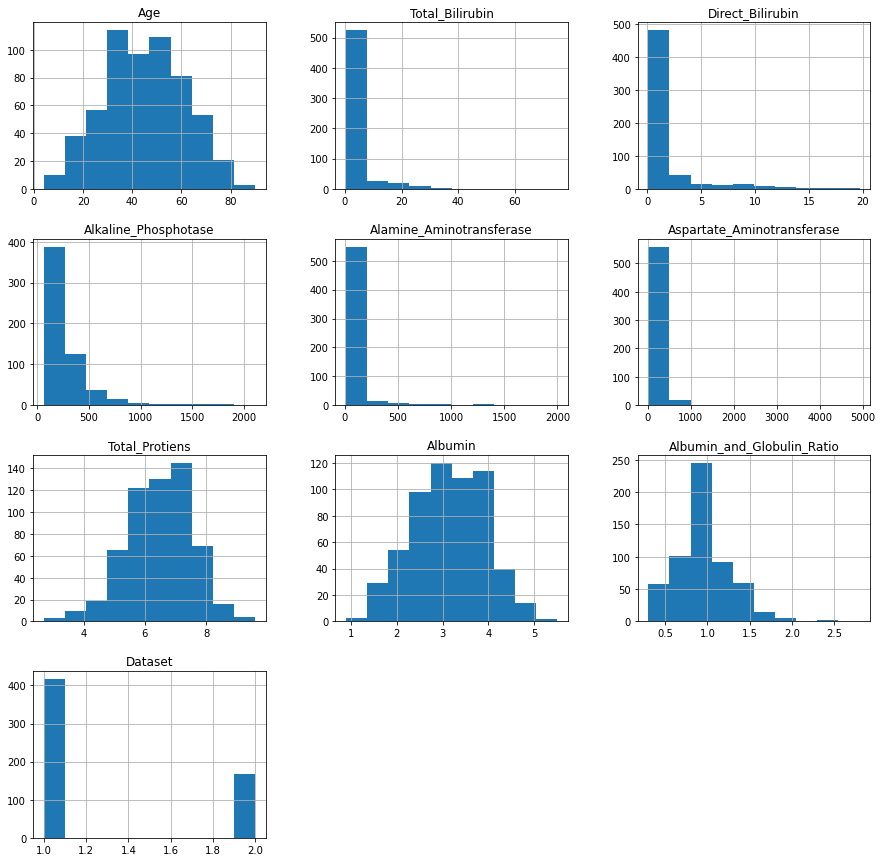

In [10]:
# Plot # Analisando através de um histograma
dados.hist(figsize = (15,15), bins = 10) 
plt.show()

Obs: Parece que há outlier nas variáveis **Alamine_Aminotransferase**, **Aspartate_Aminotransferase**, pois o valor máximo é muito mais alto que o valor médio.

A coluna dataset (variável target) tem '1' para doença hepática e '2' para nenhuma doença hepática. Vamos ajustar a variável colocando valores mais fáceis de interpretar. A classe negativa (não tem a doença) será zero.

In [11]:
# Função para ajustar a variável target
def ajusta_var(x):
    if x == 2:
        return 0
    return 1

In [12]:
# Aplica a função
dados['Dataset'] = dados['Dataset'].map(ajusta_var)

In [13]:
# Vamos ajustar o nome da variável target
# Inplace = True irá salvar no dataset, caso nao tenha irá apenas salvar na memoria
dados.rename({'Dataset':'Target'}, axis = 'columns', inplace = True)

In [14]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
127,64,Male,3.0,1.4,248,46,40,6.5,3.2,0.9,1
379,72,Male,0.7,0.2,185,16,22,7.3,3.7,1.0,0
285,13,Male,1.5,0.5,575,29,24,7.9,3.9,0.9,1
239,40,Male,0.9,0.3,196,69,48,6.8,3.1,0.8,1
409,48,Male,5.0,2.6,555,284,190,6.5,3.3,1.0,1


In [15]:
# Correlação entre as variáveis
dados.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131
Target,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.163131,1.000000


### Exploração da Variável Categórica

In [16]:
dados.describe(include = ['object'])

,Gender
count,583
unique,2
top,Male
freq,441


Número de pacientes do sexo masculino:  441
Número de pacientes do sexo feminino:  142


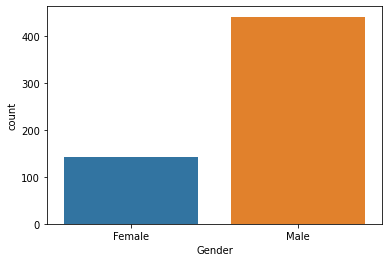

In [17]:
# Plot
sns.countplot(data = dados, x = 'Gender', label = 'Count')

# Value counts
M, F = dados['Gender'].value_counts()

# Print
print('Número de pacientes do sexo masculino: ', M)
print('Número de pacientes do sexo feminino: ', F)

Vamos aproveitar e já transformar a variável categórica em sua representação numérica usando label encoding. Além de reduzir o trabalho mais tarde, facilitará a criação de gráficos a seguir.

In [18]:
# Função para label encoding
def encoding_func(x):
    if x == 'Male':
        return 0
    return 1

In [19]:
# Aplica a função
dados['Gender'] = dados['Gender'].map(encoding_func)

In [20]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
391,75,0,0.9,0.2,162,25,20,6.9,3.7,1.10,1
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0
102,17,0,0.9,0.2,224,36,45,6.9,4.2,1.55,1
519,35,0,26.3,12.1,108,168,630,9.2,2.0,0.30,1
175,31,0,0.8,0.2,198,43,31,7.3,4.0,1.20,1


### Verificando a Relação Entre Atributos

In [21]:
dados.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


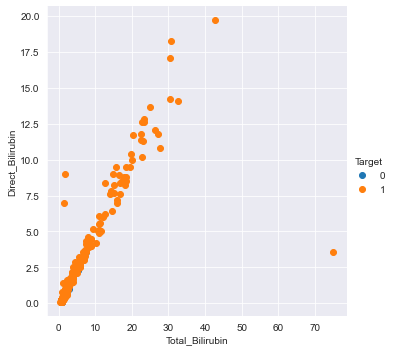

In [22]:
# Define o estilo do background
sns.set_style('darkgrid')  

# Facetgrid
sns.FacetGrid(dados, hue = 'Target', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

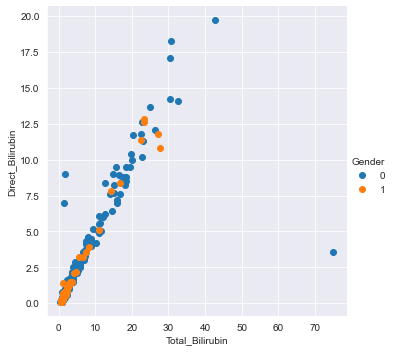

In [23]:
# Define o estilo do background
sns.set_style('darkgrid')  

# Facetgrid
sns.FacetGrid(dados, hue = 'Gender', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

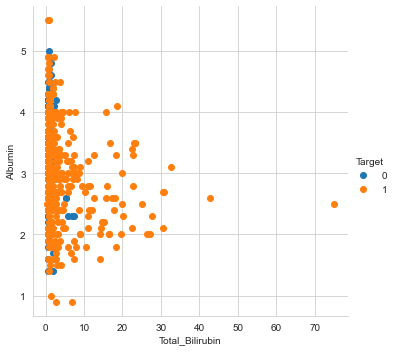

In [24]:
# Define o estilo do background
sns.set_style('whitegrid') 

# Facetgrid
sns.FacetGrid(dados, hue = 'Target', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

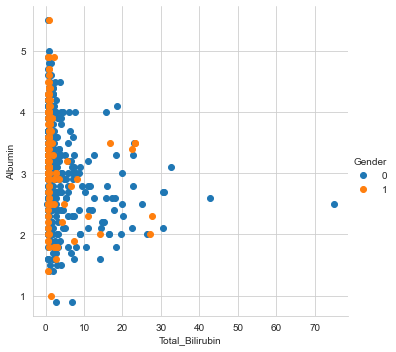

In [25]:
# Define o estilo do background
sns.set_style('whitegrid') 

# Facetgrid
sns.FacetGrid(dados, hue = 'Gender', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

### Verificando Valores Ausentes e Registros Duplicados

In [26]:
# Verificando valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [27]:
# Verificando registros duplicados (complete cases)
# Complete cases também se refere a linhas onde não há valores ausentes
dados[dados.duplicated(keep = False)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
18,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
54,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1


## Limpeza de Dados

### Tratamento de Registros Duplicados

In [28]:
dados.shape

(583, 11)

In [29]:
# Remove registros duplicados (remove uma das duplicatas)
dados = dados.drop_duplicates()
print(dados.shape)

(570, 11)


### Tratamento de Outliers

In [30]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,0.245614,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.712281
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


<AxesSubplot:xlabel='Alamine_Aminotransferase'>

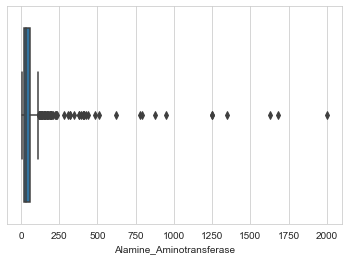

In [31]:
# Boxplot para melhor visualização
sns.boxplot(dados.Alamine_Aminotransferase)

Será que os valores extremos são mesmo outliers?

In [32]:
# Contagem de frequência por valor
# Não irei remover a variável pois os dados parecem ser reais, aí teria qeu entrar em contato
# com médico e ver se relamente sao reais
dados.Alamine_Aminotransferase.sort_values(ascending = False).head()

117    2000
27     1680
47     1630
118    1350
135    1250
Name: Alamine_Aminotransferase, dtype: int64

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

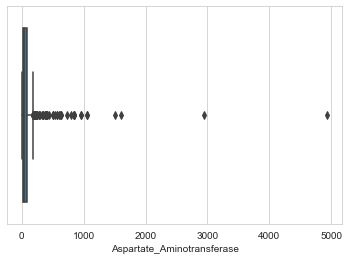

In [33]:
# Boxplot
sns.boxplot(dados.Aspartate_Aminotransferase)

In [34]:
# Contagem de frequência por valor
# Iremos remover os outliers para esta variável
dados.Aspartate_Aminotransferase.sort_values(ascending = False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [35]:
# Critério
# Mantém somente os registros onde o valor for menor ou igual a 3000
dados = dados[dados.Aspartate_Aminotransferase <= 3000]
dados.shape

(569, 11)

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

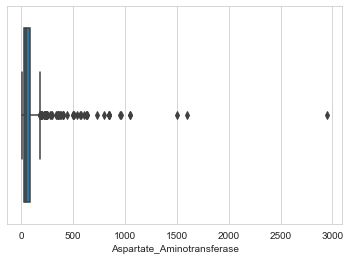

In [36]:
# Boxplot
# Ainda tem um pouco de outliers
sns.boxplot(dados.Aspartate_Aminotransferase)

In [37]:
# Contagem de frequência por valor
dados.Aspartate_Aminotransferase.sort_values(ascending = False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [38]:
# Mantém somente os registros onde o valor for menor ou igual a 2500
# Removendo novamente pois ainda há outliers 
dados = dados[dados.Aspartate_Aminotransferase <= 2500]
dados.shape

(568, 11)

In [39]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,564.000000,568.000000
mean,44.834507,0.246479,3.291197,1.482042,290.482394,74.286972,95.901408,6.496831,3.150000,0.948174,0.711268
std,16.237569,0.431340,6.257583,2.826056,243.271522,155.240601,171.956479,1.089500,0.797571,0.319301,0.453573
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,175.750000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000,1.000000


### Tratamento de Valores Ausentes

In [40]:
# Verifica se há valor ausente
dados.isnull().values.any()

True

In [41]:
# Verifica quantas colunas tem valor ausente
dados.isnull().values.any().sum()

1

In [42]:
# Lista os valores ausentes
# Regra -> 50 ou mais valores ausentes, delete a variável, pois nao faz sentido mantê-las no conjunto de dados
# Se tiver em torno de  30% poderei fazer estratégia de imputação, se for numérica, posso calcular a média e extrair mediana
# e assim preencher com media ou mediana.
# Se for categórica, posso usar a moda e preencher os valores ausentes.
# Como temos só 4 vamos removê-las
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [43]:
dados.shape

(568, 11)

In [44]:
# Drop dos registros com valores ausentes em qualquer coluna (any)
dados = dados.dropna(how = 'any')  

In [45]:
dados.shape

(564, 11)

In [46]:
# Lista os valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target


In [47]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
374,56,1,0.7,0.1,145,26,23,7.0,4.0,1.30,0
527,40,0,3.5,1.6,298,68,200,7.1,3.4,0.90,1
553,46,0,10.2,4.2,232,58,140,7.0,2.7,0.60,1
453,46,0,0.7,0.2,224,40,23,7.1,3.0,0.70,1
100,27,0,0.6,0.2,161,27,28,3.7,1.6,0.76,0


## Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

In [48]:
# Dada a alta correlação entre as variáveis Direct_Bilirubin e Total_Bilirubin, vamos remover Direct_Bilirubin
dados = dados.drop('Direct_Bilirubin', 1)

In [49]:
dados.shape

(564, 10)

### Divisão em Treino e Teste

In [50]:
dados.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,1,0.7,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,195,27,59,7.3,2.4,0.40,1


In [51]:
# Cria um objeto separado para a variável target
y = dados.Target

In [52]:
# Cria um objeto separadado para as variáveis de entrada
X = dados.drop('Target', axis = 1)

In [53]:
# Split em dados de treino e teste com amostragem estratificada
# Treino para treinar o mdelo 
# Teste para avaliar o modelo

X_treino, X_teste, y_treino, y_teste = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.25, 
                                                        random_state = 1234,
                                                        stratify = dados.Target)

In [54]:
len(X_treino)

423

In [55]:
len(X_teste)

141

In [56]:
# Print do shape
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(423, 9) (141, 9) (423,) (141,)


In [57]:
X_treino.head(2)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
205,45,0,2.5,163,28,22,7.6,4.0,1.1
390,72,0,0.8,148,23,35,6.0,3.0,1.0


### Balanceamento de Classe

In [58]:
# 1 - Desenvolveu a doença hepática
# 0 - Não desenvolveu a doença hepática

# As Classes estão desbalanceadas

y_treino.value_counts()

1    301
0    122
Name: Target, dtype: int64

In [59]:
# Instala o pacote

# Vamos aplicar uma técnica e criar dados sintéticos para a classe 0( com base nos dados apresentados)  
# aumentando assim o número de dados para 0


In [62]:
# Carrega a função SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

In [63]:
# Vamos aplicar a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors = 2)

balanceamento de classe é feito somente com dados de treino.

In [64]:
# Aplica o oversampling (deve ser feito somente com dados de treino)
# Só faço nos modelos de treino pois sao eles que serão usados para treinar o modelo
# por isso o balanceamento deve ser feito somente nele
#O balaneceamento só é feito apos eu fazer a divisao entre treino e teste, assim pego os dados de treino e aplico

X_res, y_res = over_sampler.fit_resample(X_treino, y_treino)

In [65]:
len(X_res)

602

In [66]:
len(y_res)

602

In [67]:
# Podemos ver aqui que os registros foram criados e agora estao 50/50 feitos por simote

y_res.value_counts()

1    301
0    301
Name: Target, dtype: int64

In [68]:
# Ajusta o nome do dataset de treino para X
X_treino = X_res

In [69]:
# Ajusta o nome do dataset de treino para y
y_treino = y_res

### Padronização dos Dados


In [70]:
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,45,0,2.5,163,28,22,7.6,4.0,1.1
1,72,0,0.8,148,23,35,6.0,3.0,1.0
2,18,0,0.8,282,72,140,5.5,2.5,0.8
3,42,0,8.9,272,31,61,5.8,2.0,0.5
4,42,0,0.8,127,29,30,4.9,2.7,1.2


In [71]:
# Calculamos média e desvio padrão dos dados de treino
# Não aplicamos normalização e padronização na variável alvo
treino_mean = X_treino.mean()
treino_std = X_treino.std()
print(treino_mean)
print(treino_std)

Age                            44.064784
Gender                          0.215947
Total_Bilirubin                 2.691575
Alkaline_Phosphotase          268.192691
Alamine_Aminotransferase       62.196013
Aspartate_Aminotransferase     76.647841
Total_Protiens                  6.549453
Albumin                         3.252623
Albumin_and_Globulin_Ratio      0.993617
dtype: float64
Age                            16.325336
Gender                          0.411820
Total_Bilirubin                 5.568765
Alkaline_Phosphotase          224.477184
Alamine_Aminotransferase      140.103912
Aspartate_Aminotransferase    144.241866
Total_Protiens                  1.011384
Albumin                         0.758860
Albumin_and_Globulin_Ratio      0.306115
dtype: float64


In [72]:
# Padronização
# Formula matemática
# Scikit learn tbm faz isso
X_treino = (X_treino - treino_mean) / treino_std

In [73]:
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.057286,-0.524372,-0.034402,-0.468612,-0.244076,-0.378863,1.038722,0.984869,0.347526
1,1.711157,-0.524372,-0.339676,-0.535434,-0.279764,-0.288736,-0.543268,-0.332898,0.020852
2,-1.596585,-0.524372,-0.339676,0.061509,0.069977,0.439208,-1.037640,-0.991782,-0.632496
3,-0.126477,-0.524372,1.114866,0.016961,-0.222663,-0.108483,-0.741016,-1.650665,-1.612519
4,-0.126477,-0.524372,-0.339676,-0.628985,-0.236939,-0.323400,-1.630886,-0.728228,0.674201


In [74]:
# Describe
X_treino.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02
mean,2.286838e-17,4.621626e-16,-4.258314e-16,-6.132046e-17,4.269379e-17,2.323723e-17,-8.125652e-16,-5.180518e-15,2.058154e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.454148e+00,-5.243722e-01,-4.115051e-01,-9.140915e-01,-3.725521e-01,-4.620561e-01,-3.806122e+00,-3.100209e+00,-2.265868e+00
25%,-7.390221e-01,-5.243722e-01,-3.441010e-01,-4.318599e-01,-2.869014e-01,-3.719297e-01,-6.421421e-01,-5.964517e-01,-6.324965e-01
50%,5.728617e-02,-5.243722e-01,-3.196631e-01,-3.126941e-01,-2.226634e-01,-2.887361e-01,4.997848e-02,3.110591e-02,2.085206e-02
75%,7.310855e-01,-5.243722e-01,-1.421456e-01,4.814435e-02,-7.277465e-02,-7.555255e-02,6.432247e-01,8.530919e-01,5.603374e-01
max,2.813738e+00,1.903874e+00,1.298464e+01,8.204875e+00,1.154717e+01,1.056110e+01,3.016210e+00,2.961519e+00,5.900989e+00


Explique porque usamos média e desvio dos dados de treino para padronizar os dados de teste.

In [75]:
# Usamos média e desvio de treino para padronizar o conjunto de dados de teste
# Os dados foram padronizados para atender a suposição do algorítimo
# O modelo irá aprender com dados padronizados
# Todo e qualquer dado que eu for usar tem qeu estar padronizado

# "Toda e qualquer transformação  aplicada em treino, tem que ser aplicada em teste e em novos dados"
X_teste = (X_teste - treino_mean) / treino_std

In [76]:
# Describe
X_teste.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
220,-0.432750,-0.524372,-0.339676,-0.539889,-0.251214,-0.212475,-1.532011,-0.991782,0.020852
448,0.241050,1.903874,-0.339676,-0.562163,-0.258351,-0.358064,-0.543268,-0.860005,-0.959171
509,0.118541,-0.524372,3.108126,-0.063226,0.555331,3.212328,-1.136514,-0.332898,0.674201
415,1.588648,-0.524372,-0.249889,1.879065,0.219865,-0.254072,-2.916253,-0.728228,-0.959171
56,-0.677768,-0.524372,-0.339676,-0.312694,-0.258351,-0.371930,1.434220,0.984869,0.020852


###  Construção, Treinamento e Avaliação do Modelo 1 com Regressão Logística (Benchmark)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Para a primeira versão do modelo o ideal é escolher um algoritmo simples, fácil de compreender e que será usado como Benchmark.

Obs: Como parte do processo envolve aleatoriedade, os resultados podem ser ligeiramente diferentes a cada execução deste jupyter notebook.

In [77]:
# Define lista de hiperparâmetros
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1', 'l2']}

In [78]:
# Criaremos o modelo com GridSearch 
# Vários modelos serão criados com diferentes combinações de hiperparâmetros
modelo_v1 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v1, 
                         scoring = 'roc_auc', 
                         n_jobs = -1)

In [79]:
# Treinamento do modelo
modelo_v1.fit(X_treino, y_treino)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [80]:
# Selecionamos o melhor modelo
modelo_v1.best_estimator_

LogisticRegression(C=1)

In [81]:
# Previsões com dados de teste
y_pred_v1 = modelo_v1.predict(X_teste)

In [82]:
# Mostra as 10 primeiras previsões
y_pred_v1[:10]

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [83]:
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)

In [84]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1[:10]

array([[7.06778851e-01, 2.93221149e-01],
       [4.95957625e-01, 5.04042375e-01],
       [1.04855630e-04, 9.99895144e-01],
       [6.79982426e-01, 3.20017574e-01],
       [6.88849751e-01, 3.11150249e-01],
       [6.58357322e-01, 3.41642678e-01],
       [7.26621791e-01, 2.73378209e-01],
       [9.61173906e-02, 9.03882609e-01],
       [6.04359473e-01, 3.95640527e-01],
       [8.43080970e-03, 9.91569190e-01]])

In [85]:
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
# Precisamos disso para calcula a Curva ROC
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:,1]

In [86]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1[:10]

array([0.29322115, 0.50404237, 0.99989514, 0.32001757, 0.31115025,
       0.34164268, 0.27337821, 0.90388261, 0.39564053, 0.99156919])

In [87]:
# Como exemplo, vamos verificar um dos pontos de dados 
i = 16 
print('Para o ponto de dado {}, classe real = {}, classe prevista = {}, probabilidade prevista = {}'.
      format(i, y_teste.iloc[i], y_pred_v1[i], y_pred_proba_v1[i]))

Para o ponto de dado 16, classe real = 1, classe prevista = 1, probabilidade prevista = 0.7387191607898967


In [88]:
# Matriz de confusão
confusion_matrix(y_teste, y_pred_v1)

array([[31,  9],
       [40, 61]], dtype=int64)

In [89]:
# Extraindo cada valor da CM
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v1).ravel()

In [90]:
print(tn, fp, fn, tp)

31 9 40 61


In [91]:
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v1 = roc_auc_score(y_teste, y_pred_v1)
print(roc_auc_v1)

0.6894801980198021


In [92]:
# Calcula a curva ROC com dados e previsões em teste
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)

In [93]:
# AUC em teste
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.7331683168316832


In [94]:
# Acurácia em teste
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
print(acuracia_v1)

0.6524822695035462


### Feature Importance

In [95]:
# Construindo o modelo novamente com os melhores hiperparâmetros
# Isso é necessário pois a versão final não deve ter o GridSearchCV
modelo_v1 = LogisticRegression(C = 1)
modelo_v1.fit(X_treino, y_treino)

LogisticRegression(C=1)

In [96]:
# Obtemos os coeficientes pelo maior maior usando np.argsort
indices = np.argsort(-abs(modelo_v1.coef_[0,:]))

In [97]:
print("Variáveis mais importantes para o resultado do modelo_v1:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v1:
--------------------------------------------------
Aspartate_Aminotransferase
Total_Bilirubin
Alamine_Aminotransferase
Albumin
Total_Protiens
Gender
Age
Alkaline_Phosphotase
Albumin_and_Globulin_Ratio


In [98]:
# Salva o modelo em disco
with open('modelos/modelo_v1.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v1, 'modelos/modelo_v1.pkl') 

In [99]:
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

In [100]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v1 = {'Nome': 'modelo_v1', 
                  'Algoritmo': 'Regressão Logística', 
                  'ROC_AUC Score': roc_auc_v1,
                  'AUC Score': auc_v1,
                  'Acurácia': acuracia_v1}

In [101]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v1, ignore_index = True)

In [102]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.68948,0.733168,0.652482


### Construção, Treinamento e Avaliação do Modelo 2 com Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Nosso desafio agora é tentar obter um modelo melhor que a versão 1. Vamos tentar o algoritmo Random Forest.

In [103]:
# Grid de hiperparâmetros
tuned_params_v2 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}

In [104]:
# Cria o modelo com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros
modelo_v2 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)

In [105]:
# Treina o modelo
modelo_v2.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [106]:
# Extrai o melhor modelo
modelo_v2.best_estimator_

RandomForestClassifier(min_samples_split=5)

In [107]:
# Previsões em teste
y_pred_v2 = modelo_v2.predict(X_teste)

In [108]:
# Obtém as previsões para a classe positiva
y_pred_proba_v2 = modelo_v2.predict_proba(X_teste)[:,1]

In [109]:
# Matriz de Confusão
confusion_matrix(y_teste, y_pred_v2)

array([[20, 20],
       [19, 82]], dtype=int64)

In [110]:
# Curva ROC nos dados e previsões em teste
roc_auc_v2 = roc_auc_score(y_teste, y_pred_v2)
print(roc_auc_v2)

0.655940594059406


In [111]:
# Curva ROC nos dados e previsões em teste
fpr_v2, tpr_v2, thresholds = roc_curve(y_teste, y_pred_proba_v2)

In [112]:
# AUC em teste
auc_v2 = auc(fpr_v2, tpr_v2)
print(auc_v2)

0.7336633663366336


In [113]:
# Acurácia em teste
acuracia_v2 = accuracy_score(y_teste, y_pred_v2)
print(acuracia_v2)

0.723404255319149


### Feature Importance

In [114]:
# Recria o modelo com os melhores hiperparâmetros
modelo_v2 = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 4)
modelo_v2.fit(X_treino, y_treino)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [115]:
# Variáveis mais relevantes
indices = np.argsort(-modelo_v2.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v2:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v2:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Aspartate_Aminotransferase
Alamine_Aminotransferase
Albumin_and_Globulin_Ratio
Age
Albumin
Total_Protiens
Gender


In [116]:
# Salva o modelo em disco
with open('modelos/modelo_v2.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v2, 'modelos/modelo_v2.pkl') 

In [117]:
# Dicionário com as métricas do modelo_v2
dict_modelo_v2 = {'Nome': 'modelo_v2', 
                  'Algoritmo': 'Random Forest', 
                  'ROC_AUC Score': roc_auc_v2,
                  'AUC Score': auc_v2,
                  'Acurácia': acuracia_v2}

In [118]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v2, ignore_index = True)

In [119]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.689480,0.733168,0.652482
1,modelo_v2,Random Forest,0.655941,0.733663,0.723404


### Construção, Treinamento e Avaliação do Modelo 3 com KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Vamos tentar agora um algoritmo mais simples, o KNN. Para esse algoritmo precisamos antes definir o valor de K, que é o número de vizinhos mais próximos.

In [120]:
# Lista de possíveis valores de K
vizinhos = list(range(1, 20, 2))

In [121]:
# Lista para os scores
cv_scores = []

In [122]:
# Validação cruzada para determinar o melhor valor de k
for k in vizinhos:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_treino, y_treino, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())   

In [123]:
# Ajustando o erro de classificação
erro = [1 - x for x in cv_scores]

In [124]:
# Determinando o melhor valor de k (com menor erro)
optimal_k = vizinhos[erro.index(min(erro))]
print('O valor ideal de k é %d' % optimal_k)

O valor ideal de k é 1


In [125]:
# Criamos o modelo versão 3
modelo_v3 = KNeighborsClassifier(n_neighbors = optimal_k)

In [126]:
# Treinamento
modelo_v3.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=1)

In [127]:
# Previsões
y_pred_v3 = modelo_v3.predict(X_teste)

In [128]:
# Confusion Matrix
confusion_matrix(y_teste, y_pred_v3)

array([[17, 23],
       [38, 63]], dtype=int64)

In [129]:
# Previsão de probabilidade da classe positiva
y_pred_proba_v3 = modelo_v3.predict_proba(X_teste)[:,1]

In [130]:
# Calcula ROC_AUC em teste
roc_auc_v3 = roc_auc_score(y_teste, y_pred_v3)
print(roc_auc_v3)

0.524381188118812


In [131]:
# Calcula curva ROC
fpr_v3, tpr_v3, thresholds = roc_curve(y_teste, y_pred_proba_v3)

In [132]:
# Calcula AUC em teste
auc_v3 = auc(fpr_v3, tpr_v3)
print(auc_v3)

0.524381188118812


In [133]:
# Calcula acurácia
acuracia_v3 = accuracy_score(y_teste, y_pred_v3)
print(acuracia_v3)

0.5673758865248227


Obs: Com o algoritmo KNN não extraímos as variáveis mais importantes, pois o conceito do algoritmo é diferente.

In [134]:
# Salva o modelo em disco
with open('modelos/modelo_v3.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v3, 'modelos/modelo_v3.pkl') 

In [135]:
# Dicionário com as métricas do modelo_v3
dict_modelo_v3 = {'Nome': 'modelo_v3', 
                  'Algoritmo': 'KNN', 
                  'ROC_AUC Score': roc_auc_v3,
                  'AUC Score': auc_v3,
                  'Acurácia': acuracia_v3}

In [136]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v3, ignore_index = True)

In [137]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.689480,0.733168,0.652482
1,modelo_v2,Random Forest,0.655941,0.733663,0.723404
2,modelo_v3,KNN,0.524381,0.524381,0.567376


### Construção, Treinamento e Avaliação do Modelo 4 com Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Na versão 4 do modelo usaremos um modelo de árvore de decisão.

In [138]:
# Hiperparâmetros
tuned_params_v4 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}

In [139]:
# Cria o modelo com RandomizedSearchCV
modelo_v4 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)

In [140]:
# Treinamento
modelo_v4.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [141]:
# Melhor modelo
modelo_v4.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [142]:
# Previsões de classe
y_pred_v4 = modelo_v4.predict(X_teste)

In [143]:
# Previsões de probabilidade
y_pred_proba_v4 = modelo_v4.predict_proba(X_teste)[:,1]

In [144]:
# Confusion matrix
confusion_matrix(y_teste, y_pred_v4)

array([[29, 11],
       [55, 46]], dtype=int64)

In [145]:
# Calcula ROC AUC score
roc_auc_v4 = roc_auc_score(y_teste, y_pred_v4)
print(roc_auc_v4)

0.5902227722772277


In [146]:
# Curva ROC
fpr_v4, tpr_v4, thresholds = roc_curve(y_teste, y_pred_proba_v4)

In [147]:
# AUC
auc_v4 = auc(fpr_v4, tpr_v4)
print(auc_v4)

0.6533415841584158


In [148]:
# Calcula acurácia
acuracia_v4 = accuracy_score(y_teste, y_pred_v4)
print(acuracia_v4)

0.5319148936170213


### Feature Importance

In [149]:
# Recriando o modelo
modelo_v4 = DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 6, max_depth = 4)
modelo_v4.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [150]:
# Variáveis mais importantes
indices = np.argsort(-modelo_v4.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v4:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v4:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Alamine_Aminotransferase
Total_Protiens
Albumin
Aspartate_Aminotransferase
Albumin_and_Globulin_Ratio
Age
Gender


In [151]:
# Salva o modelo em disco
with open('modelos/modelo_v4.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v4, 'modelos/modelo_v4.pkl') 

In [152]:
# Dicionário com as métricas do modelo_v4
dict_modelo_v4 = {'Nome': 'modelo_v4', 
                  'Algoritmo': 'Decision Tree', 
                  'ROC_AUC Score': roc_auc_v4,
                  'AUC Score': auc_v4,
                  'Acurácia': acuracia_v4}

In [153]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v4, ignore_index = True)

In [154]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.689480,0.733168,0.652482
1,modelo_v2,Random Forest,0.655941,0.733663,0.723404
2,modelo_v3,KNN,0.524381,0.524381,0.567376
3,modelo_v4,Decision Tree,0.590223,0.653342,0.531915


### Construção, Treinamento e Avaliação do Modelo 5 com SVM

https://scikit-learn.org/stable/modules/svm.html

Para a quinta e última versão do modelo usaremos SVM.

In [155]:
# Função para seleção de hiperparâmetros
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = nfolds)
    grid_search.fit(X_treino, y_treino)
    grid_search.best_params_
    return grid_search.best_params_

In [156]:
# Aplica a função
svc_param_selection(X_treino, y_treino, 5)

{'C': 10, 'gamma': 1}

In [157]:
# Cria o modelo com os melhores hiperparâmetros
modelo_v5 = SVC(C = 1, gamma = 1, probability = True)

In [158]:
# Treinamento
modelo_v5.fit(X_treino, y_treino)

SVC(C=1, gamma=1, probability=True)

In [159]:
# Previsões de classe
y_pred_v5 = modelo_v5.predict(X_teste)

In [160]:
confusion_matrix(y_teste, y_pred_v5)

array([[18, 22],
       [29, 72]], dtype=int64)

In [161]:
# Previsões de probabilidade
y_pred_proba_v5 = modelo_v5.predict_proba(X_teste)[:, 1]

In [162]:
# Calcula ROC AUC score
roc_auc_v5 = roc_auc_score(y_teste, y_pred_v5)
print(roc_auc_v5)

0.5814356435643564


In [163]:
# Calcula curva ROC
fpr_v5, tpr_v5, thresholds = roc_curve(y_teste, y_pred_proba_v5)

In [164]:
# Calcula AUC score
auc_v5 = auc(fpr_v5, tpr_v5)
print(auc_v5)

0.6301980198019802


In [165]:
# Calcula acurácia
acuracia_v5 = accuracy_score(y_teste, y_pred_v5)
print(acuracia_v5)

0.6382978723404256


In [166]:
# Salva o modelo em disco
with open('modelos/modelo_v5.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v5, 'modelos/modelo_v5.pkl') 

In [167]:
# Dicionário com as métricas do modelo_v5
dict_modelo_v5 = {'Nome': 'modelo_v5', 
                  'Algoritmo': 'SVM', 
                  'ROC_AUC Score': roc_auc_v5,
                  'AUC Score': auc_v5,
                  'Acurácia': acuracia_v5}

In [168]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v5, ignore_index = True)

In [169]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.689480,0.733168,0.652482
1,modelo_v2,Random Forest,0.655941,0.733663,0.723404
2,modelo_v3,KNN,0.524381,0.524381,0.567376
3,modelo_v4,Decision Tree,0.590223,0.653342,0.531915
4,modelo_v5,SVM,0.581436,0.630198,0.638298


### Seleção do Melhor Modelo

In [170]:
# Usaremos o modelo que teve o maior AUC Score, por se tratar de uma métrica global
# O score AUC é o ideal para comparar modelos de diferentes algoritmos
df_melhor_modelo = df_modelos[df_modelos['AUC Score'] == df_modelos['AUC Score'].max()]

In [171]:
df_melhor_modelo

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
1,modelo_v2,Random Forest,0.655941,0.733663,0.723404


## Previsões com o Melhor Modelo Treinado

In [172]:
# Obtemos o nome do melhor modelo
modelo = df_melhor_modelo.Nome.to_string(index = False)
modelo

'modelo_v2'

In [173]:
# Carregamos o melhor modelo do disco
melhor_modelo = joblib.load('modelos/' + modelo + '.pkl')
melhor_modelo

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [174]:
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [175]:
# Dados brutos de um novo paciente
# O número de colunas deve ser o mesmo do que foi usado em treino
novo_paciente = [72, 1, 0.8, 186, 15, 29, 7.1, 3.4, 0.97]

In [176]:
# Converte o objeto para array
arr_paciente = np.array(novo_paciente)

In [177]:
# Usamos média e desvio de treino para padronizar novos dados
arr_paciente = (arr_paciente - treino_mean) / treino_std

In [178]:
# Converte o objeto para array
arr_paciente = np.array(arr_paciente)

In [179]:
# Dados do paciente padronizados (exatamente como o modelo espera receber os dados)
arr_paciente

array([ 1.71115718,  1.90387448, -0.3396759 , -0.36615165, -0.33686435,
       -0.33033294,  0.54435033,  0.19420845, -0.07715022])

In [180]:
# Previsões de classe (por que a linha abaixo apresenta erro?)
#pred_novo_paciente = melhor_modelo.predict(arr_paciente)

In [181]:
# Previsões de classe
pred_novo_paciente = melhor_modelo.predict(arr_paciente.reshape(1, -1))

In [182]:
# Verifica o valor e imprime o resultado final
if pred_novo_paciente == 1:
    print('Este paciente deve apresentar doença hepática!')
else:
    print('Este paciente não deve apresentar doença hepática!')

Este paciente não deve apresentar doença hepática!


# Fim

Obs: As Técnicas aqui aprendidas e utilizadas são uma das que aplicamos no curso que faço atualmente, ministrado pela Data Science Academy.